In [5]:
import pandas as pd

In [2]:
patch1="Call-Center-Dataset.csv"
patch2="movies.csv"
patch3="employee_data.csv"
patch4="SampleSuperstore.csv"
patch5="StudentPerformanceFactors.csv"
data1=pd.read_csv(patch1,delimiter=";")
data2=pd.read_csv(patch2,delimiter=",")
data3=pd.read_csv(patch3,delimiter=",")
data4=pd.read_csv(patch4,delimiter=",")
data5=pd.read_csv(patch5,delimiter=",")


In [3]:
df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)
df3=pd.DataFrame(data3)
df4=pd.DataFrame(data4)
df5=pd.DataFrame(data5)

**For the beginner Project We use the df3** 
1.  Pour la répartition et les disparités : ✅


- Un diagramme en barres comparant le salaire moyen par poste 
- Un diagramme en anneau  homme/femme
- Un graphique pour visualiser la distribution des salaires selon l'expérience


2.  Pour l'analyse de l'expérience :


- Un scatter plot (nuage de points) mettant en relation l'expérience et le salaire
- Une heat map montrant la correlation entre expérience, salaire et genre
- Un histogramme de la distribution de l'expérience dans l'entreprise


3. Pour la diversité des postes :


- Un camembert ou treemap montrant la répartition des employés par poste
- Un diagramme en barres empilées montrant la proportion homme/femme par poste
- Un waffle chart pour visualiser le ratio homme/femme global


4. Pour l'analyse des salaires :


- Une courbe de densité des salaires pour voir leur distribution
- Un graphique en bandes pour comparer les fourchettes salariales par poste
- Un radar chart comparant les salaires moyens par poste selon le genre


5. Pour les tendances :


- Un line plot montrant l'évolution des salaires en fonction de l'expérience
- Un bubble chart avec 3 dimensions : poste, expérience et salaire
- Un treemap hiérarchique : poste → genre → niveau d'expérience

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Bar Chart for Average Salary by Job Title:

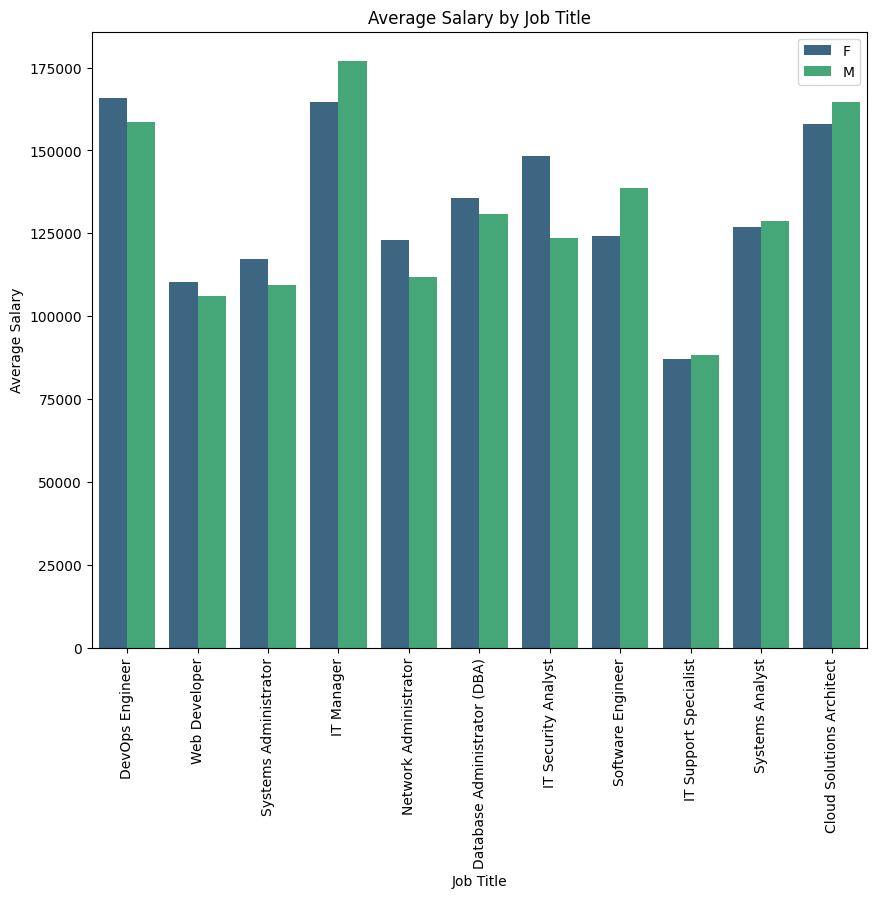

In [5]:
# Bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Position', y='Salary', data=df3,hue='Gender',palette='viridis',errorbar=None)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()


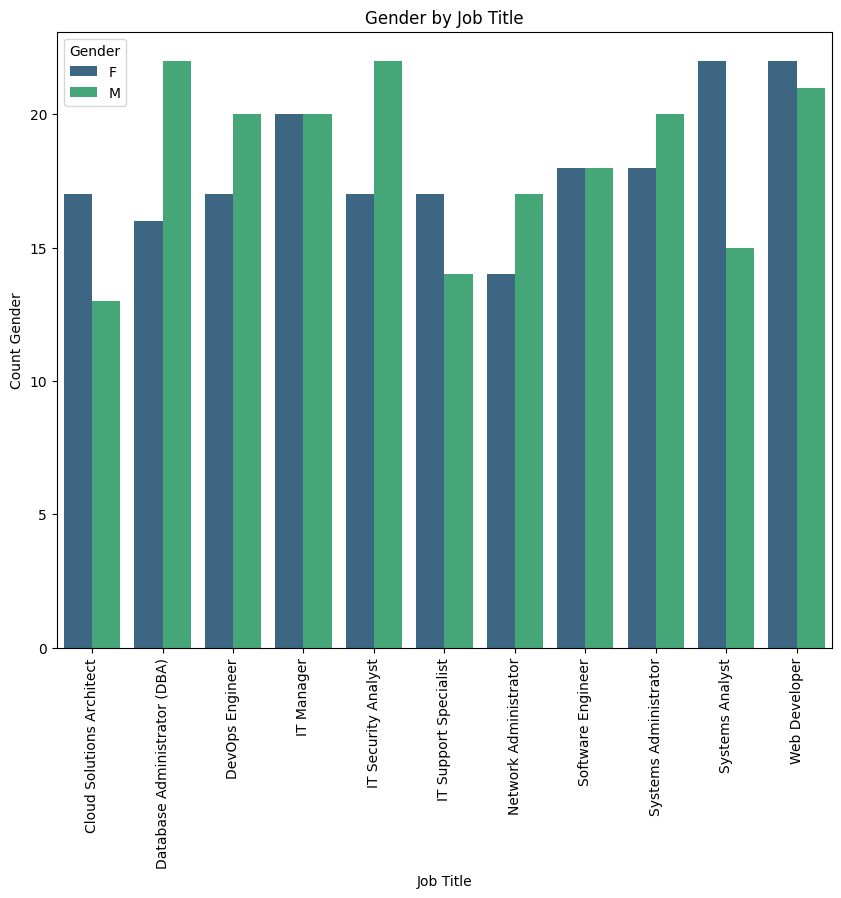

In [6]:
# Bar chart
tab=df3.groupby(['Position','Gender']).size().reset_index(name='Count')
plt.figure(figsize=(10, 8))
sns.barplot(data=tab,x='Position',y='Count',hue='Gender',palette='viridis') 
plt.title('Gender by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count Gender')
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x2000 with 0 Axes>

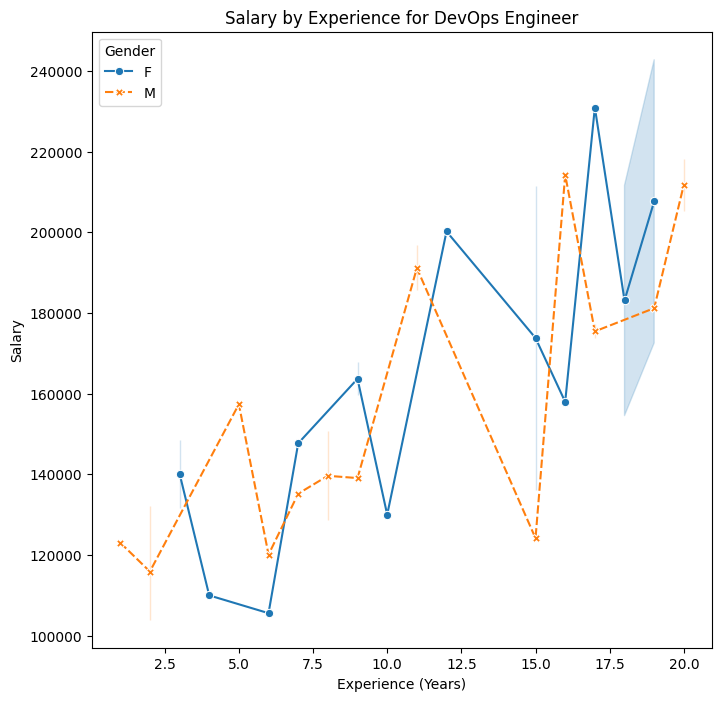

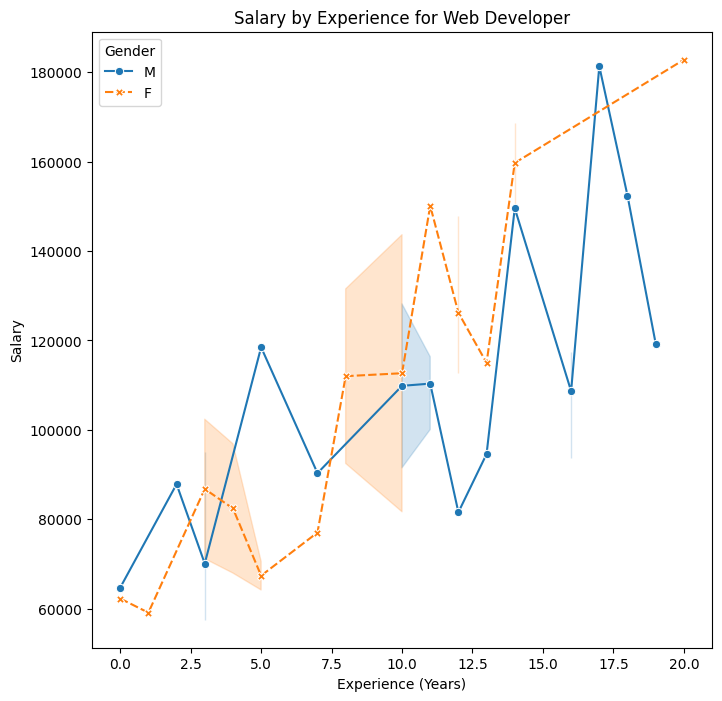

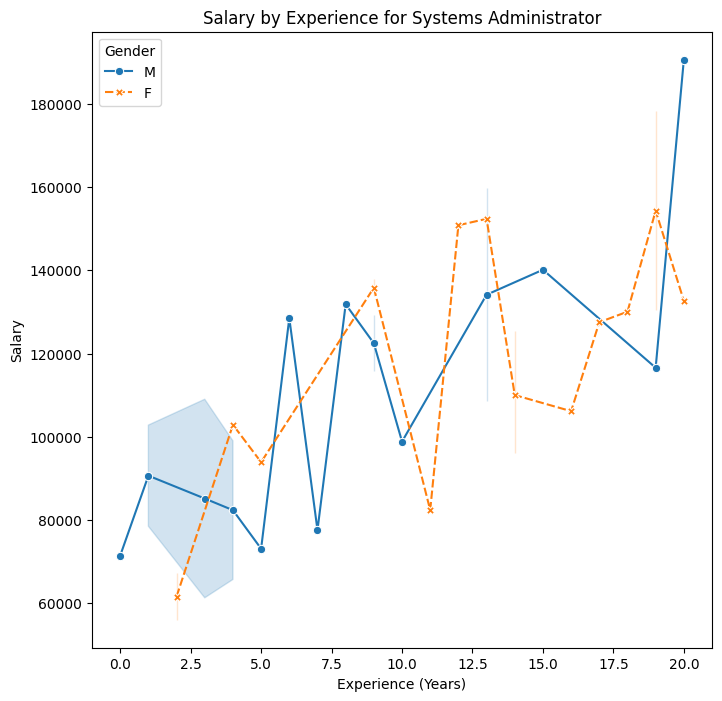

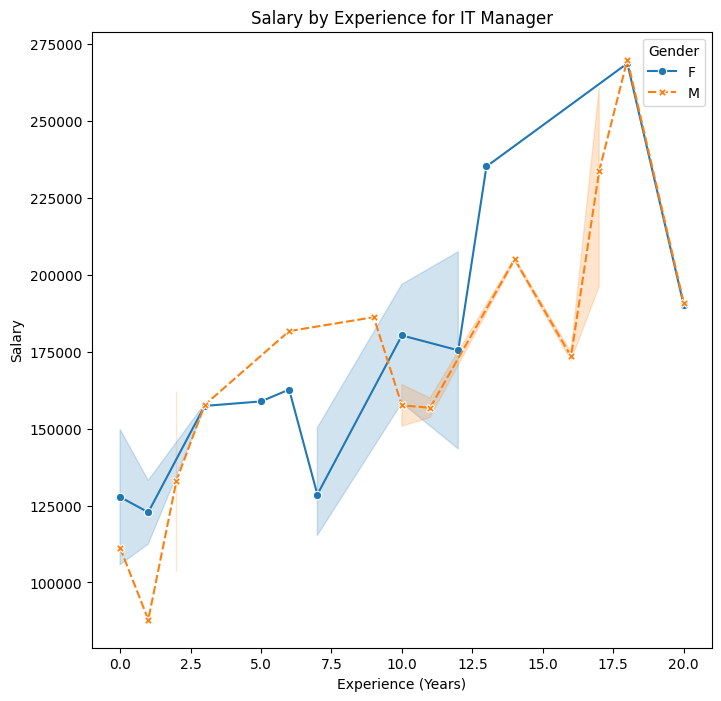

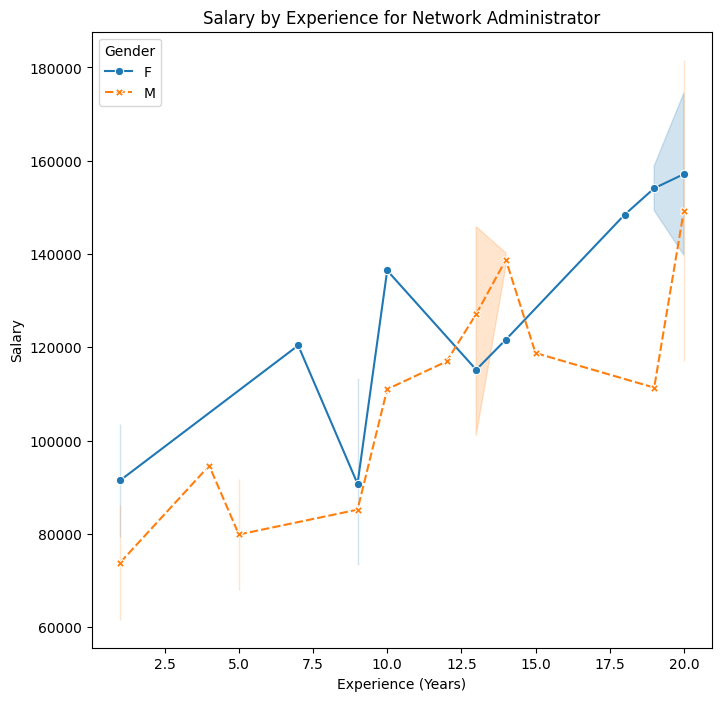

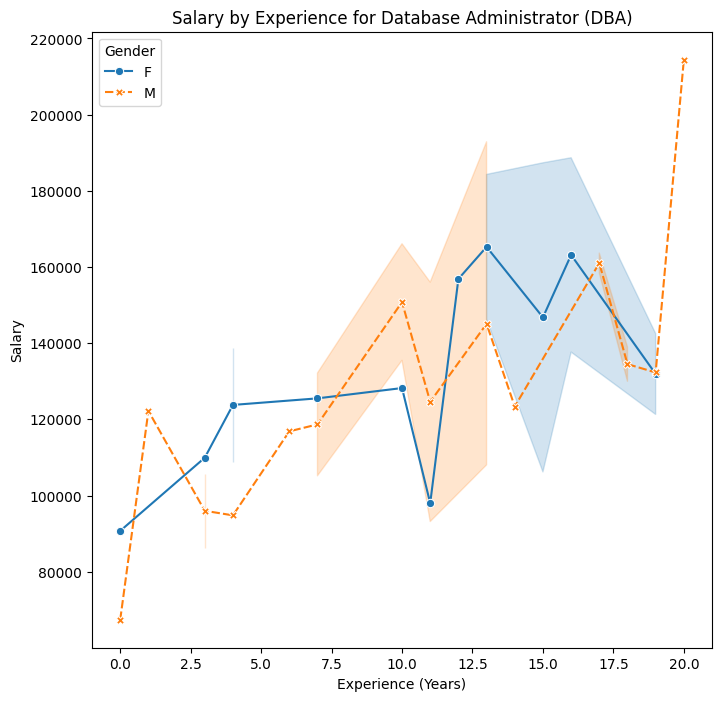

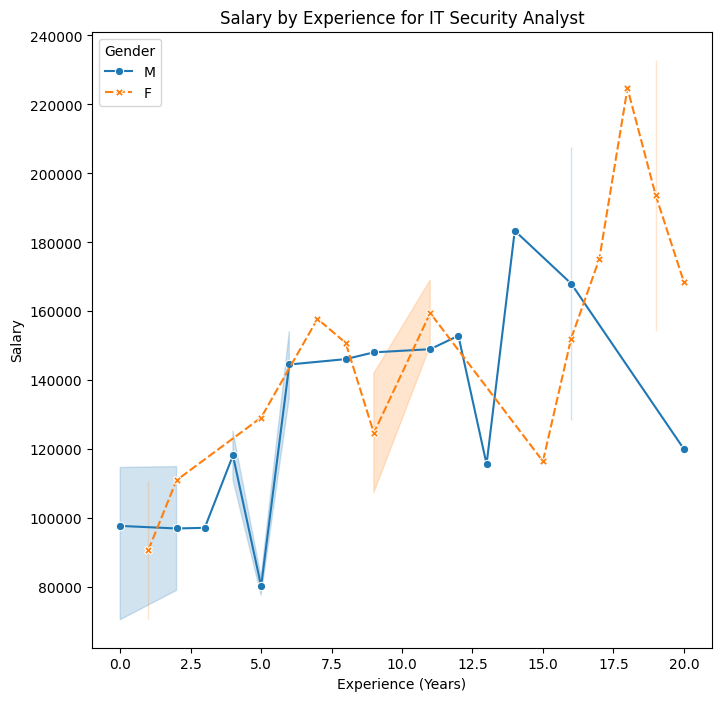

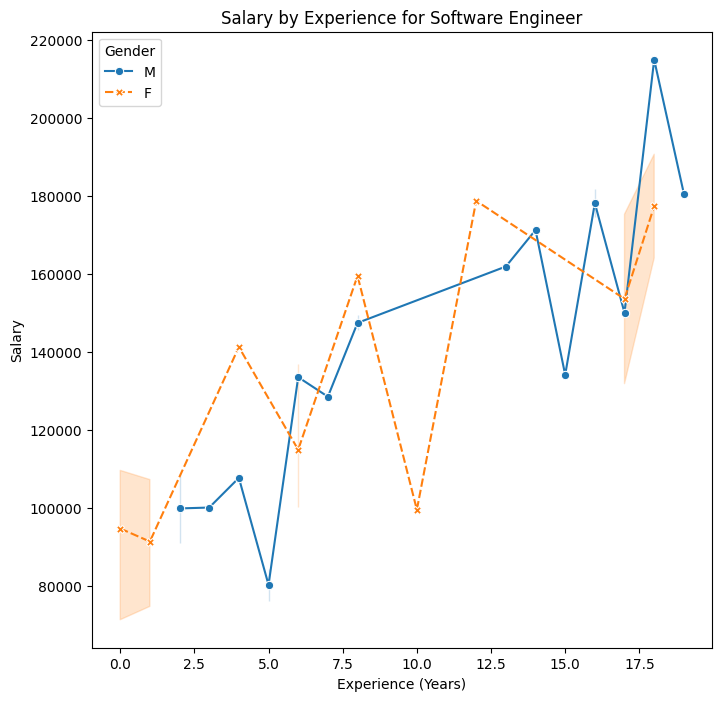

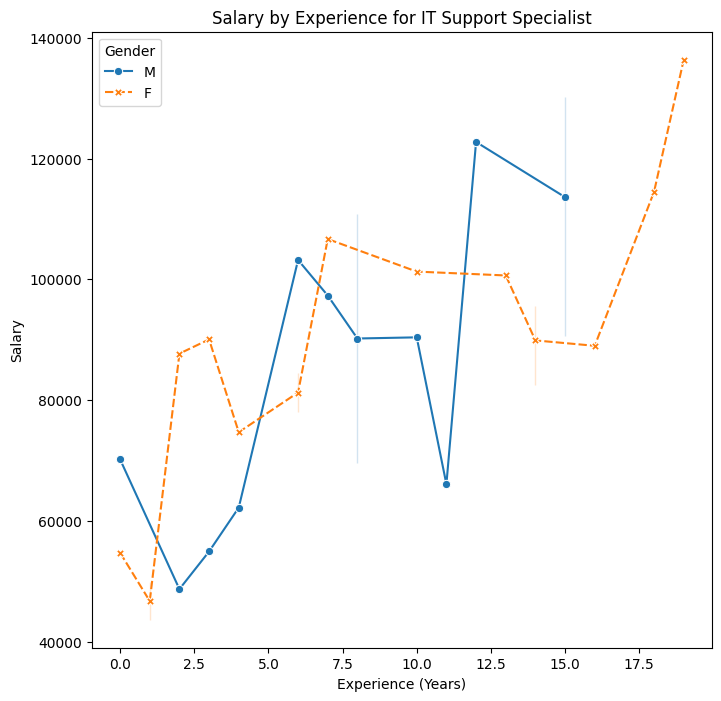

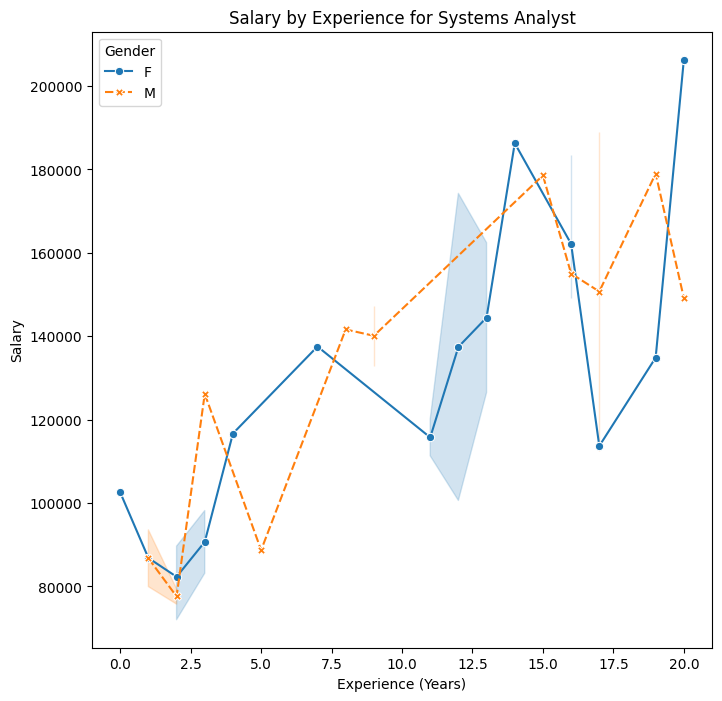

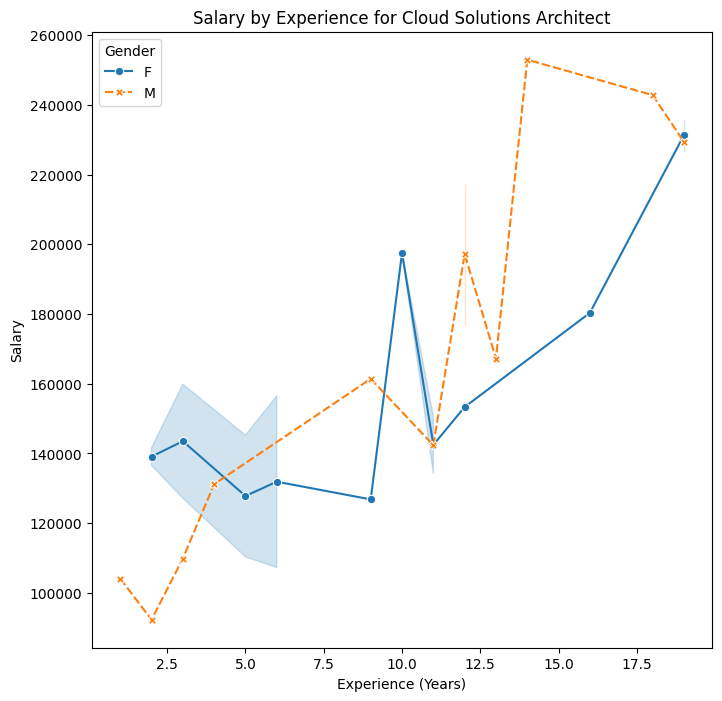

In [7]:
plt.figure(figsize=(20, 20))

def create_graph(data,position):
    data=data[data['Position']==position]
    plt.figure(figsize=(8, 8))
    sns.lineplot(y='Salary',x='Experience (Years)',hue='Gender',style='Gender',markers=True,data=data)
    plt.title('Salary by Experience for '+position)
    plt.show()
positions=df3['Position'].unique()
for position in positions:
    create_graph(df3,position)

In [8]:
grouped_df = df3.groupby(['Position', 'Gender']).size().reset_index(name='Count')
grouped_df.head()

,Position,Gender,Count
0,Cloud Solutions Architect,F,17
1,Cloud Solutions Architect,M,13
2,Database Administrator (DBA),F,16
3,Database Administrator (DBA),M,22
4,DevOps Engineer,F,17


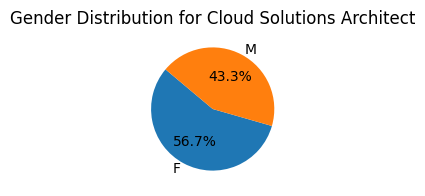

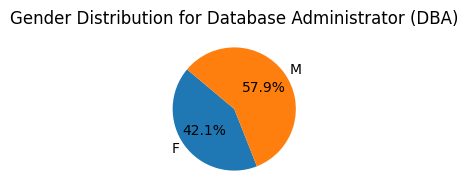

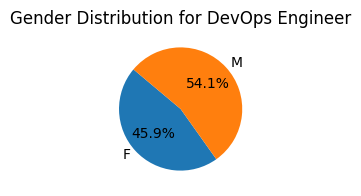

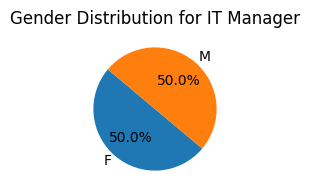

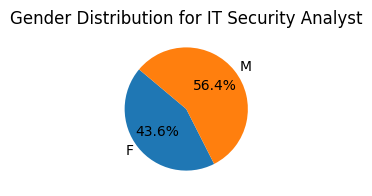

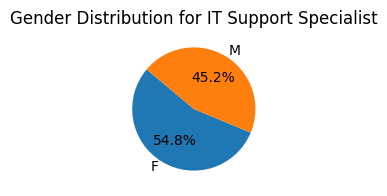

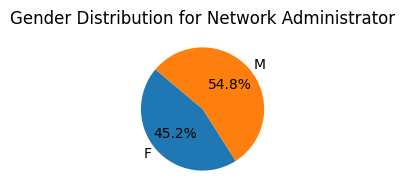

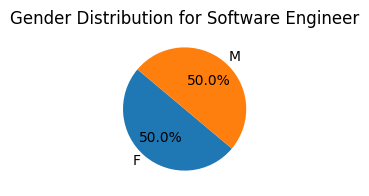

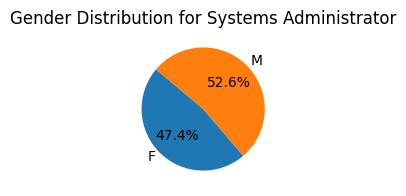

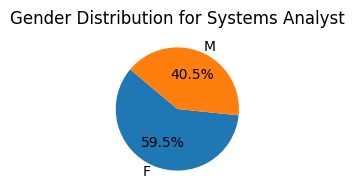

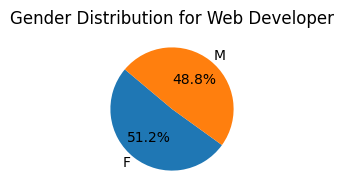

In [9]:
grouped_df = df3.groupby(['Position', 'Gender']).size().reset_index(name='Count')

# Get unique job titles
job_titles = grouped_df['Position'].unique()

# Function to create pie chart
def create_pie_chart(data, job_title):
    plt.figure(figsize=(2, 2))
    plt.pie(data['Count'], labels=data['Gender'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Gender Distribution for {job_title}')
    plt.show()

# Create pie charts for each job title
for job_title in job_titles:
    job_data = grouped_df[grouped_df['Position'] == job_title]
    create_pie_chart(job_data, job_title)

**For the intermediaire I Project We use the df1**
1. Analyse temporelle de la charge de travail :✅
    - Un histogramme empilé par département montrerait la répartition de la charge de travail entre les services


2. Performance des agents :


   - Un diagramme en boîte (boxplot) du Speed of Answer par agent révélerait la consistance et les variations dans les temps de réponse ✅
   - Un graphique en barres horizontales comparant l'AvgTalkDuration par agent aiderait à identifier ceux qui prennent plus ou moins de temps avec les clients ✅

3. Qualité de service : ✅


    - Un graphique en secteurs pour le taux de résolution (Resolved Y/N) par département donnerait une vue claire de l'efficacité
    - Un graphique en barres groupées croisant la satisfaction (Satisfaction rating) avec le temps de réponse permettrait de voir la corrélation entre ces métriques


4. Analyse par département : ✅


    - Un treemap montrant le volume d'appels par département et sous-catégorisé par agent offrirait une vue hiérarchique de la distribution du travail
    - Un diagramme en violon pour les temps de conversation par département aiderait à comprendre les patterns de durée des appels selon le type de problème

**Pour les KPIs essentiels à suivre :**

1. Efficacité opérationnelle :


    - Taux de résolution au premier appel (First Call Resolution Rate)
    - Temps moyen de réponse (Average Speed of Answer)
    - Durée moyenne de traitement (Average Handle Time)
    - Taux d'appels répondus vs manqués


2. Qualité de service :


    - Score moyen de satisfaction client
    - Pourcentage d'appels résolus
    - Distribution des notes de satisfaction
    - Corrélation entre temps de réponse et satisfaction


3. Performance des agents :


   - Productivité individuelle (nombre d'appels traités)
   - Taux de résolution par agent
   - Temps moyen de traitement par agent
   - Scores de satisfaction moyens par agent


4. Analyse départementale :


    - Volume d'appels par département
    - Taux de résolution par type de problème
    - Temps moyen de traitement par catégorie
    - Performance comparative entre départements

Ces visualisations et KPIs permettraient de repondre aux problemes suivants :

Les goulots d'étranglement dans le processus
Les moments de surcharge ou de sous-utilisation des ressources
Les corrélations entre rapidité de service et satisfaction client
Les besoins en formation ou en ressources supplémentaires
Les meilleures pratiques à partir des performances des agents les plus efficaces

In [10]:
df1=pd.DataFrame(data1)
df1.head()


,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,,Unnamed: 10
0,ID0001,01/01/2015 9:12,Diane,Washing Machine,Y,Y,109,00:02:23,3,,NaN
1,ID0002,01/01/2015 9:12,Becky,Air Conditioner,Y,N,70,00:04:02,3,,NaN
2,ID0003,01/01/2015 9:47,Stewart,Washing Machine,Y,Y,10,00:02:11,3,,NaN
3,ID0004,01/01/2015 9:47,Greg,Washing Machine,Y,Y,53,00:00:37,2,,NaN
4,ID0005,01/01/2015 10:00,Becky,Toaster,Y,Y,95,00:01:00,3,,NaN


In [11]:
df1.columns=df1.columns.str.strip()
df1['Date']=df1['Date'].str.strip()

In [12]:
# Convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'],format='%d/%m/%Y %H:%M')

# Create new columns for date and time
df1['Date_Only'] = df1['Date'].dt.strftime('%d/%m/%Y')
df1['Time_Only'] = df1['Date'].dt.strftime('%H:%M')
df1.head()

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,,Unnamed: 10,Date_Only,Time_Only
0,ID0001,2015-01-01 09:12:00,Diane,Washing Machine,Y,Y,109,00:02:23,3,,NaN,01/01/2015,09:12
1,ID0002,2015-01-01 09:12:00,Becky,Air Conditioner,Y,N,70,00:04:02,3,,NaN,01/01/2015,09:12
2,ID0003,2015-01-01 09:47:00,Stewart,Washing Machine,Y,Y,10,00:02:11,3,,NaN,01/01/2015,09:47
3,ID0004,2015-01-01 09:47:00,Greg,Washing Machine,Y,Y,53,00:00:37,2,,NaN,01/01/2015,09:47
4,ID0005,2015-01-01 10:00:00,Becky,Toaster,Y,Y,95,00:01:00,3,,NaN,01/01/2015,10:00


In [13]:
df1['Month_Only'] = df1['Date'].dt.month_name()

In [14]:
df1['Month_Only'].value_counts()

Month_Only
January     1772
February    1616
March       1612
Name: count, dtype: int64

In [15]:
# Convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'],format='%d/%m/%Y %H:%M')

# Create new columns for date and time
df1['Date_Only'] = df1['Date'].dt.strftime('%d/%m/%Y')
df1['Time_Only'] = df1['Date'].dt.strftime('%H:%M')

# Drop the original 'Date' column if needed
df1.drop(columns=['Date'],inplace=True)

# Function to categorize the time of day
def categorize_time_of_day(hour):
    if 9 <= hour <= 12:
        return 'Morning'
    elif 13 <= hour <= 15:
        return 'Afternoon'
    elif 16 <= hour < 18:
        return 'Evening'

# Extract the hour from the 'Time_Only' column
df1['Daytime'] = pd.to_datetime(df1['Time_Only'], format='%H:%M').dt.hour.apply(categorize_time_of_day)
df1.rename(columns={'Date_Only':'Date'})
df1.drop(columns=['Time_Only'],inplace=True)

#Delate and replace unnecessary columns
df1.rename(columns={'Date_Only':'Date'},inplace=True)
df1.drop(columns=['Call Id','Unnamed: 10'],inplace=True)

# Update the 'Date' column to display the day of the week
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y').dt.day_name()

# Display the updated dataframe
df1.head()



,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,,Date,Month_Only,Daytime
0,Diane,Washing Machine,Y,Y,109,00:02:23,3,,Thursday,January,Morning
1,Becky,Air Conditioner,Y,N,70,00:04:02,3,,Thursday,January,Morning
2,Stewart,Washing Machine,Y,Y,10,00:02:11,3,,Thursday,January,Morning
3,Greg,Washing Machine,Y,Y,53,00:00:37,2,,Thursday,January,Morning
4,Becky,Toaster,Y,Y,95,00:01:00,3,,Thursday,January,Morning


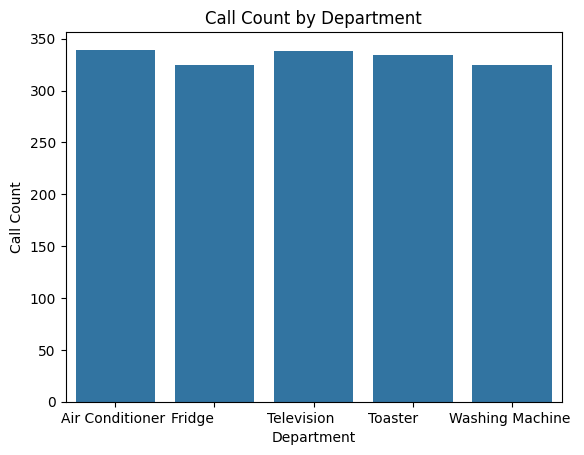

In [18]:
sns.barplot(x='Department', y='Count', data=data1,errorbar=None)
plt.xlabel('Department')
plt.ylabel('Call Count')
plt.title('Call Count by Department')
plt.show()

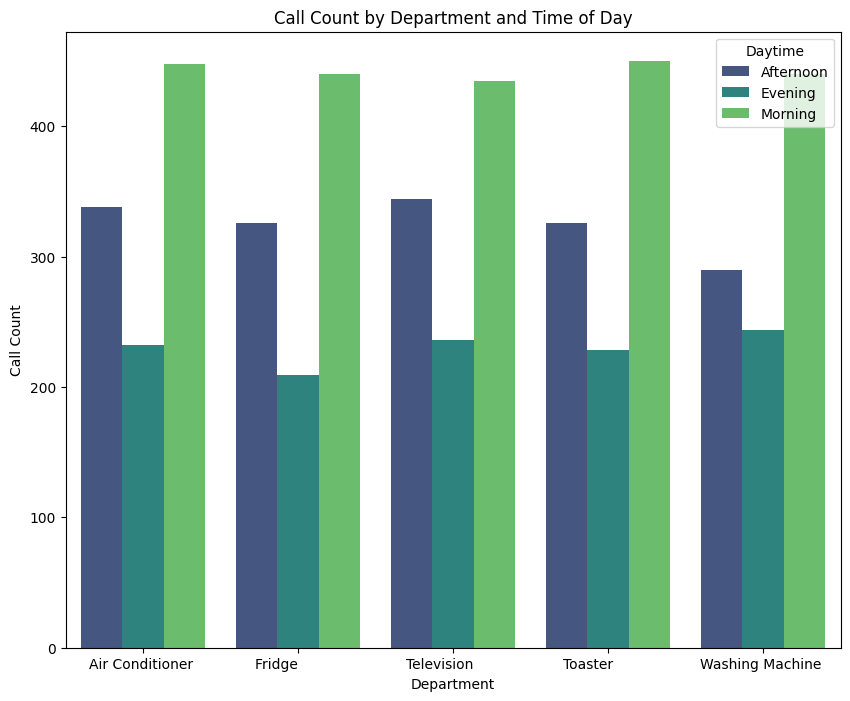

In [17]:
data1=df1.groupby(['Department','Daytime']).size().reset_index(name='Count')
plt.figure(figsize=(10, 8))
sns.barplot(x='Department', y='Count', data=data1, hue='Daytime', palette='viridis')
plt.xlabel('Department')
plt.ylabel('Call Count')
plt.title('Call Count by Department and Time of Day')
plt.show()

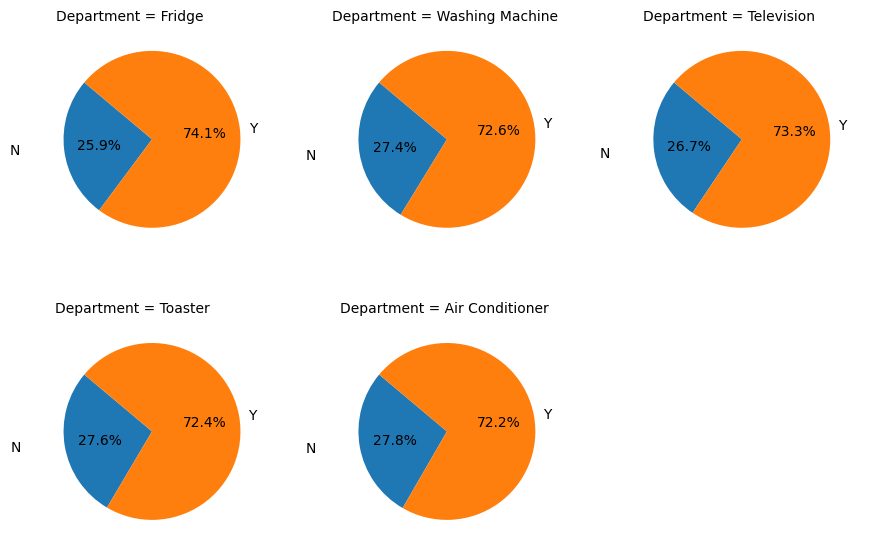

In [19]:
table = df1[['Department', 'Resolved']].value_counts().reset_index(name='Count').sort_values(by='Count', ascending=True)

# Function to create pie chart
def create_pie_chart(data, **kwargs):
	plt.pie(data['Count'], labels=data['Resolved'], autopct='%1.1f%%', startangle=140)

g = sns.FacetGrid(table, col='Department', col_wrap=3)
g.map_dataframe(create_pie_chart)
plt.show()

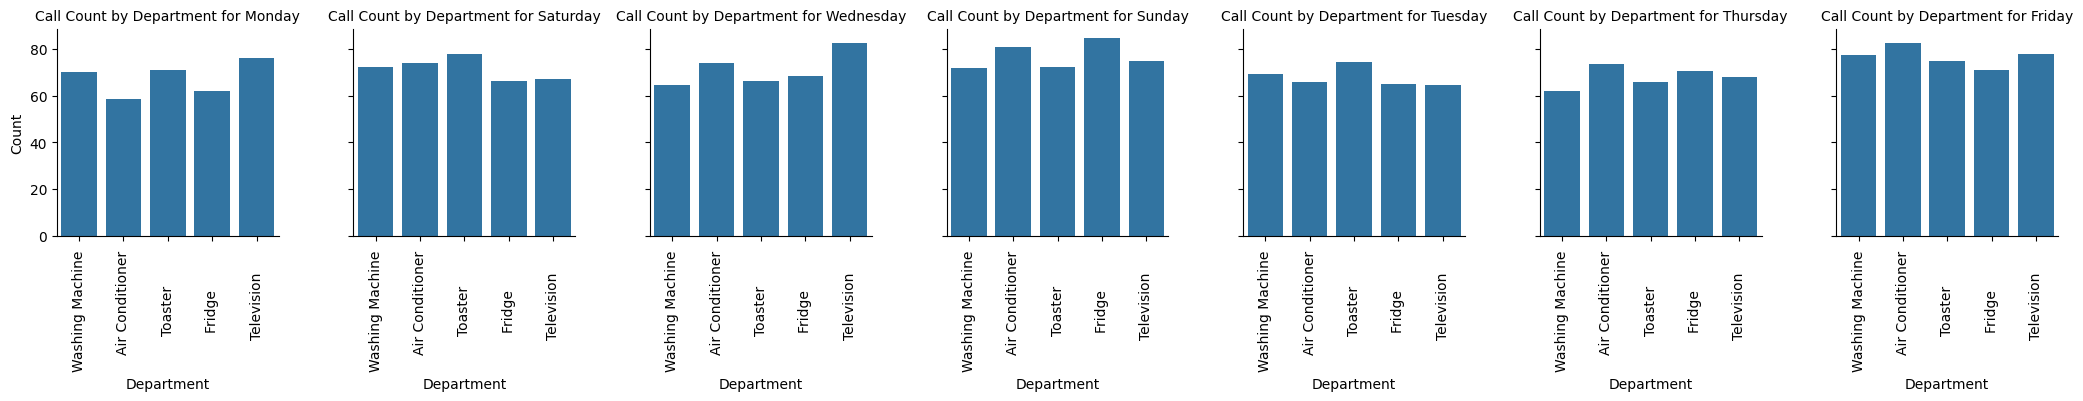

In [20]:
table=df1[['Date','Department','Resolved']].value_counts().reset_index(name='Count').sort_values(by='Count',ascending=True)
g=sns.FacetGrid(table,col='Date')
g.map(sns.barplot,'Department','Count',errorbar=None,order=df1['Department'].unique())
g.set_titles('Call Count by Department for {col_name}')
g.set_xticklabels(rotation=90)
plt.show()

To import your Jupyter Notebook project to GitHub, you can follow these steps:

1. **Save your Jupyter Notebook**: Make sure your Jupyter Notebook is saved with a `.ipynb` extension.

2. **Create a GitHub Repository**:
    - Go to [GitHub](https://github.com) and log in to your account.
    - Click on the `+` icon in the top right corner and select `New repository`.
    - Fill in the repository name, description (optional), and choose whether it will be public or private.
    - Click on `Create repository`.

3. **Clone the Repository to Your Local Machine**:
    - Open a terminal or command prompt.
    - Navigate to the directory where you want to clone the repository.
    - Use the following command to clone the repository:
      ```bash
      git clone https://github.com/your-username/your-repository-name.git
      ```
    - Replace `your-username` with your GitHub username and `your-repository-name` with the name of your repository.

4. **Copy Your Jupyter Notebook to the Repository**:
    - Copy your Jupyter Notebook file (`.ipynb`) to the cloned repository directory.

5. **Commit and Push the Changes**:
    - Navigate to the cloned repository directory in your terminal or command prompt.
    - Use the following commands to add, commit, and push your changes to GitHub:
      ```bash
      git add your-notebook.ipynb
      git commit -m "Add Jupyter Notebook project"
      git push origin main
      ```
    - Replace `your-notebook.ipynb` with the name of your Jupyter Notebook file.

6. **Verify on GitHub**:
    - Go back to your GitHub repository page.
    - You should see your Jupyter Notebook file listed in the repository.

In [385]:
tab=df1.groupby(['Agent','Date']).size().reset_index(name='Count_Call')



In [40]:
# Group by 'Agent' and 'Date' and calculate the total number of calls
total_calls_by_date = df1.groupby(['Agent', 'Date']).size().reset_index(name='Total_Calls')

# Display the new dataframe
total_calls_by_date.head()

,Agent,Date,Total_Calls
0,Becky,Friday,108
1,Becky,Monday,79
2,Becky,Saturday,90
3,Becky,Sunday,113
4,Becky,Thursday,94


In [459]:
table=df1['AvgTalkDuration'].str.strip()
tab=(pd.to_datetime(table,format='%H:%M:%S').dt.minute*60 + pd.to_datetime(table,format='%H:%M:%S').dt.second).round(0)
tab


0       143.0
1       242.0
2       131.0
3        37.0
4        60.0
        ...  
4995    340.0
4996    196.0
4997    109.0
4998     58.0
4999      NaN
Name: AvgTalkDuration, Length: 5000, dtype: float64

In [ ]:
# Remove or replace invalid values in 'Speed of Answer' column
df1['Speed of Answer'] = df1['Speed of Answer'].str.strip()  # Remove leading/trailing spaces
df1['Speed of Answer'] = df1['Speed of Answer'].replace('', '0')  # Replace empty strings with '0'
df1['Speed of Answer'] = df1['Speed of Answer'].astype(int)  # Convert to integers

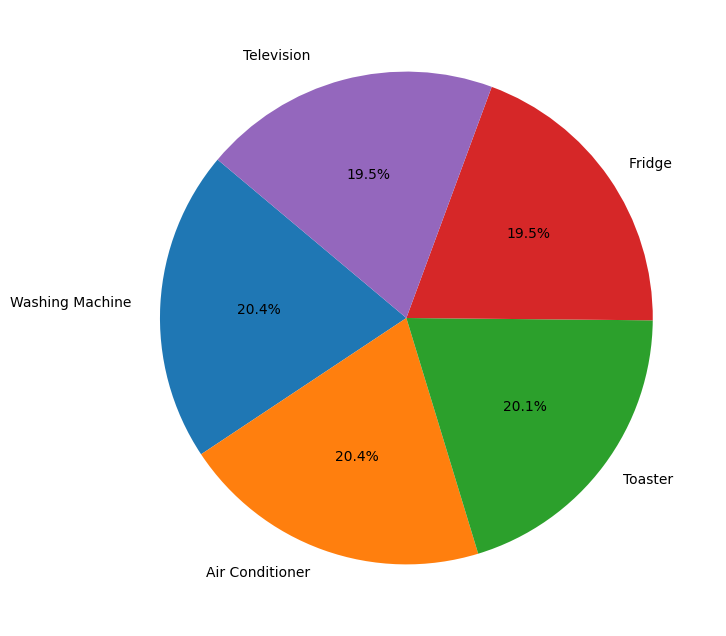

In [24]:
plt.figure(figsize=(10, 8))
plot=plt.pie(df1['Department'].value_counts(), labels=df1['Department'].unique(), autopct='%1.1f%%', startangle=140)
plt.show()


**PRÉSENTATION DU PROBLÈME :**

"Comment optimiser la réussite scolaire en identifiant les facteurs clés influençant les performances des élèves ?"
VISUALISATIONS ESSENTIELLES :

Performance et Facteurs Personnels

Graphique de dispersion : Hours_Studied vs Exam_Score

Permet d'identifier rapidement si plus d'heures d'étude = meilleures notes
Repérer les cas atypiques (beaucoup d'heures/mauvaises notes ou peu d'heures/bonnes notes)


Impact Socio-économique

Graphique à barres groupées : Family_Income + Access_to_Resources vs Exam_Score

Visualiser les disparités potentielles
Identifier où concentrer les ressources de soutien

Bien-être et Performance


Graphique combiné : Sleep_Hours + Physical_Activity vs Exam_Score

Comprendre l'impact du mode de vie sur les résultats
Base pour des recommandations de santé scolaire

PROBLÈMES POTENTIELS À EXPLORER :

Inégalités d'accès :
Certains élèves peuvent avoir un accès limité aux ressources
Distance école-domicile importante
Accès internet limité


Facteurs de bien-être :
Manque de sommeil
Niveau de stress
Équilibre activités scolaires/extrascolaires


Support éducatif :
Variations dans l'implication parentale
Accès inégal au tutorat
Qualité variable de l'enseignement

Ces visualisations permettront de :
Identifier les groupes d'élèves nécessitant un soutien particulier
Optimiser l'allocation des ressources
Développer des programmes de soutien ciblés
Mettre en place des interventions préventives

Le principal pourra ainsi prendre des décisions basées sur des données concrètes pour améliorer la réussite scolaire de tous les élèves.


* Hours_Studied : Nombre d'heures consacrées à l'étude par l'élève (probablement par semaine/mois)
* Attendance : Taux de présence aux cours (généralement en pourcentage)
* Parental_Involvement : Niveau d'implication des parents dans l'éducation (peut être une échelle, ex: 1-5)
* Access_to_Resources : Accès aux ressources éducatives (livres, matériel scolaire, etc.)
* Extracurricular_Activities : Participation aux activités parascolaires (sports, clubs, etc.)
* Sleep_Hours : Nombre d'heures de sommeil quotidien moyen
* Previous_Scores : Notes obtenues précédemment (moyennes antérieures)
* Motivation_Level : Niveau de motivation de l'élève (probablement sur une échelle)
* Internet_Access : Disponibilité d'accès à Internet à domicile (oui/non ou qualité de l'accès)
* Tutoring_Sessions : Nombre ou fréquence des séances de tutorat suivies
* Family_Income : Revenu familial (peut être par tranches ou valeur précise)
* Teacher_Quality : Évaluation de la qualité de l'enseignement reçu
* School_Type : Type d'établissement (public/privé/autre)
* Peer_Influence : Impact des camarades sur l'apprentissage (positif/négatif, échelle)
* Physical_Activity : Niveau d'activité physique de l'élève
* Learning_Disabilities : Présence de troubles d'apprentissage (oui/non ou type)
* Parental_Education_Level : Niveau d'études le plus élevé des parents
* Distance_from_Home : Distance entre le domicile et l'école
* Gender : Genre de l'élève
* Exam_Score : Note finale obtenue à l'examen (variable à prédire/analyser)

In [18]:
path="StudentPerformanceFactors.csv"
data5=pd.read_csv(path,delimiter=",").dropna()
data5.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [142]:
total_count=len(data5)

Gender=data5['Gender'].value_counts().tolist()
Percent_Male=(Gender[0]/total_count)
Percent_Female=(Gender[1]/total_count)

In [145]:
round(Percent_Female, 2)

0.42

In [136]:
data5['Gender'].value_counts()

Gender
Male      3688
Female    2690
Name: count, dtype: int64

In [230]:
categorical=data5.select_dtypes(exclude=['float','int64'])
dict={}
for column in categorical.columns:
    dict[f'{column}']= data5[f'{column}'].unique().tolist()
dict

{'Parental_Involvement': ['Low', 'Medium', 'High'],
 'Access_to_Resources': ['High', 'Medium', 'Low'],
 'Extracurricular_Activities': ['No', 'Yes'],
 'Motivation_Level': ['Low', 'Medium', 'High'],
 'Internet_Access': ['Yes', 'No'],
 'Family_Income': ['Low', 'Medium', 'High'],
 'Teacher_Quality': ['Medium', 'High', 'Low'],
 'School_Type': ['Public', 'Private'],
 'Peer_Influence': ['Positive', 'Negative', 'Neutral'],
 'Learning_Disabilities': ['No', 'Yes'],
 'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
 'Distance_from_Home': ['Near', 'Moderate', 'Far'],
 'Gender': ['Male', 'Female'],
 'Student_Category': ['Assiduous', 'Moderate', 'Disengaged', 'Nerd']}

In [290]:
test=categorical[['Access_to_Resources','Motivation_Level']].groupby('Access_to_Resources').value_counts()
test

Access_to_Resources  Motivation_Level
High                 Medium               986
                     Low                  543
                     High                 371
Low                  Medium               626
                     Low                  392
                     High                 256
Medium               Medium              1625
                     Low                  929
                     High                 650
Name: count, dtype: int64

In [183]:
Extracurricular_Activities=data5['Extracurricular_Activities'].value_counts().to_dict()
Peer_Influence=data5['Peer_Influence'].value_counts().to_dict()


dict_values([3807, 2571])

**Presentation Schoolar**

In [21]:
import plotly.express as px
import plotly.graph_objects as go


In [199]:
fig=go.Figure(data=[
    go.Pie(labels=list(Peer_Influence.keys()), values=list(Peer_Influence.values()), hole=0.6)
])
fig.update_traces(hoverinfo="label+percent")
# Add annotations in the center of the donut pies.
fig.update_layout(
    title_text="Global Emissions 1990-2011",
    annotations=[{
        'text': 'Peer Influence', 
        'x': 0.5, 
        'y': 0.5, 
        'font_size': 20, 
        'showarrow': False
    }]
)
fig.show()

In [24]:
categorical['Parental_Education_Level'].unique().tolist()

['High School', 'College', 'Postgraduate']

In [54]:
school=categorical[['School_Type','Teacher_Quality']].groupby('Teacher_Quality').value_counts().reset_index(name='Count').sort_values(by='Count',ascending=False)
school

,Teacher_Quality,School_Type,Count
4,Medium,Public,2661
0,High,Public,1316
5,Medium,Private,1165
1,High,Private,589
2,Low,Public,457
3,Low,Private,190


In [170]:
fig=px.funnel(
    school,
    y='Teacher_Quality',
    x='Count',
    color='School_Type'
)
fig.update_yaxes(title=None)
fig.update_layout(
    title={
        'text': 'Teacher Quality',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 25}
    }
)

fig.show()

In [ ]:
fig.update_layout(
    title={
        'text': 'Teacher_Quality',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 14}
    }
)
fig.show()

In [75]:
numeric=data5.select_dtypes(exclude=['object'])

In [44]:
numeric.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [52]:
data5['Gender'].value_counts()

Gender
Male      3814
Female    2793
Name: count, dtype: int64

In [202]:
numeric.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [286]:
data5[['Hours_Studied','Physical_Activity']].groupby(['Physical_Activity','Hours_Studied']).value_counts().reset_index(name='Count').sort_values(by='Physical_Activity')

,Physical_Activity,Hours_Studied,Count
0,0,8,1
18,0,28,1
16,0,26,1
15,0,25,4
14,0,24,3
...,...,...,...
203,6,12,1
202,6,10,1
201,6,9,1
208,6,19,3


In [253]:
data5[['Student_Category','Physical_Activity']].groupby('Physical_Activity').value_counts().reset_index(name='Count')

,Physical_Activity,Student_Category,Count
0,0,Moderate,24
1,0,Assiduous,18
2,0,Disengaged,2
3,1,Moderate,218
4,1,Assiduous,144
5,1,Disengaged,33
6,1,Nerd,5
7,2,Moderate,897
8,2,Assiduous,514
9,2,Disengaged,122


In [ ]:
fig=go.Figure()
columns=['Sleep_Hours','Tutoring_Sessions','Physical_Activity']
for col in columns:
    data=data5[['Student_Category',f'{col}']].sort_values(by=f'{col}').value_counts().reset_index(name='Count')
    fig.add_trace(
        go.Bar(y=data['Count'], x=data['Student_Category'],name=f'{col}',or)
    )
fig.update_traces(hoverinfo="x+y")
fig.update_xaxes(categoryorder='array', categoryarray=['Disengaged', 'Moderate', 'Assiduous', 'Nerd']
)

fig.show()

In [282]:
fig=go.Figure()
columns=['Sleep_Hours','Tutoring_Sessions','Physical_Activity']
for col in columns:
    data=data5[['Student_Category',f'{col}']].value_counts().reset_index(name='Count').sort_values(by='Count')
    fig.add_trace(
        go.Bar(x=data['Count'], y=data['Student_Category'],name=f'{col}',text=data[f'{col}'],orientation='h')
    )
    fig.update_traces(hoverinfo="x+y")
fig.update_yaxes(categoryorder='array', categoryarray=['Disengaged', 'Moderate', 'Assiduous', 'Nerd']
)

fig.show()

In [297]:
data5['Exam_Score'].values

array([67, 61, 74, ..., 68, 68, 64], dtype=int64)

In [308]:
df=data5[data5['Student_Category'] == 'Nerd']
fig=go.Figure(data=[
    go.Scatter(y=df['Exam_Score'], x=df.index, mode='none',name='Exam_Score',
    stackgroup='one'
    ),
    go.Scatter(y=df['Previous_Scores'],x=df.index,mode='none',name='Previous Score',stackgroup='one')
])

fig.show()

In [263]:
len(data5)

6378

In [262]:
fig=go.Figure(data=[
    go.Bar(x=data5['Tutoring_Sessions'], y=data5['Student_Category'],name='Tutor Session', orientation='h'
    ),
    go.Bar(x=data5['Physical_Activity'], y=data5['Student_Category'],name='Sport_Hours', orientation='h'
    ),
    go.Bar(x=data5['Sleep_Hours'], y=data5['Student_Category'],name='Sleep_Hours', orientation='h'
    )
])

fig.update_yaxes(categoryorder='array', categoryarray=['Disengaged', 'Moderate', 'Assiduous', 'Nerd']
)

fig.show()

In [51]:
homme,femme=data5['Gender'].value_counts().iloc[1],data5['Gender'].value_counts().iloc[0]
print(homme,femme)

2793 3814


In [220]:
data5['Student_Category'].value_counts()

Student_Category
Moderate      3741
Assiduous     2033
Disengaged     489
Nerd           115
Name: count, dtype: int64

In [200]:
numeric.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


In [77]:
numeric['Tutoring_Sessions'].value_counts()

Tutoring_Sessions
1    2111
2    1586
0    1458
3     800
4     296
5     101
6      18
7       7
8       1
Name: count, dtype: int64

In [102]:
motivation=categorical[['Parental_Involvement','Access_to_Resources','Motivation_Level','Family_Income','Teacher_Quality','School_Type']]
Parental_Involvement=motivation['Parental_Involvement'].value_counts().reset_index(name='Count')
Access_to_Resources=motivation['Access_to_Resources'].value_counts().reset_index(name='Count')
Motivation_Level=motivation['Motivation_Level'].value_counts().reset_index(name='Count')
Family_Income=motivation['Family_Income'].value_counts().reset_index(name='Count')
Teacher_Quality=motivation['Teacher_Quality'].value_counts().reset_index(name='Count')

In [104]:
fig=go.Figure(data=[
    go.Bar(name='Motivation_Level',x=Motivation_Level['Motivation_Level'],y=Motivation_Level['Count']),
    go.Bar(name='Parental_Involvement',x=Parental_Involvement['Parental_Involvement'],y=Parental_Involvement['Count']),
    go.Bar(name='Teacher_Quality',x=Teacher_Quality['Teacher_Quality'],y=Teacher_Quality['Count']),
])
# Change the bar mode
fig.update_layout(barmode='group')

# Define the order for the categories
category_order = ['Low', 'Medium', 'High']

# Update the figure with the specified category order
fig.update_xaxes(categoryorder='array', categoryarray=category_order)

# Show the updated figure
fig.show()


In [107]:
parent_motivation=data5[['Parental_Involvement','Access_to_Resources','Family_Income','School_Type','Parental_Education_Level']]

In [108]:
parent_motivation=parent_motivation.groupby(['Parental_Involvement','Parental_Education_Level']).value_counts().reset_index(name='Count')
parent_motivation.head(5)

,Parental_Involvement,Parental_Education_Level,Access_to_Resources,Family_Income,School_Type,Count
0,High,College,Medium,Medium,Public,87
1,High,College,Medium,Low,Public,61
2,High,College,High,Medium,Public,46
3,High,College,High,Low,Public,41
4,High,College,Low,Low,Public,41


In [133]:
fig=px.bar(parent_motivation, x='Parental_Involvement', y='Count', color='School_Type', facet_col='Parental_Education_Level',facet_row='Family_Income', barmode='group',
           category_orders={'Parental_Involvement': ['Low', 'Medium', 'High'],
                            'Parental_Education_Level':['High School','College','Postgraduate'],
                            'Family_Income':['Low', 'Medium', 'High']}
            )
fig.show()


In [ ]:
import plotly.graph_objects as go

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [10, 15, 7, 12]
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']

# Create a bar chart
fig = go.Figure(data=[
    go.Bar(x=categories, y=values, marker_color=colors)
])

# Update layout
fig.update_layout(
    title='Colored Bar Chart',
    xaxis_title='Categories',
    yaxis_title='Values'
)

# Show the figure
fig.show()
# Assign colors based on values
colors = ['#636EFA' if val < 10 else '#EF553B' if val < 15 else '#00CC96' for val in values]

# Update the bar chart with new colors
fig.update_traces(marker_color=colors)

# Show the updated figure
fig.show()

In [309]:
categorical.head(5)

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Student_Category
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male,Assiduous
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female,Moderate
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male,Assiduous
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male,Assiduous
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female,Moderate


In [310]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from prince import MCA, PCA as PRINCE_PCA

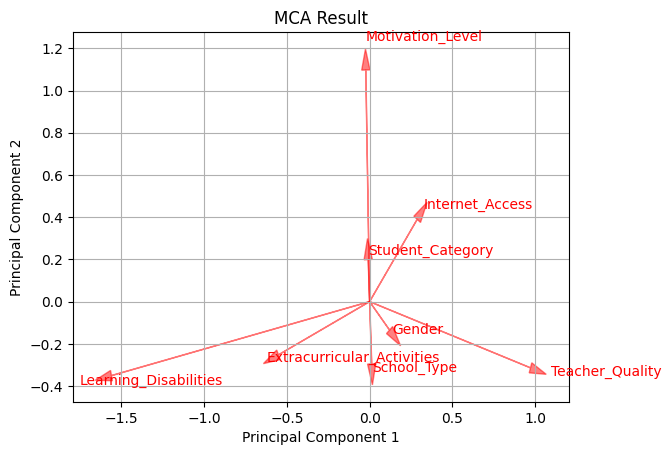

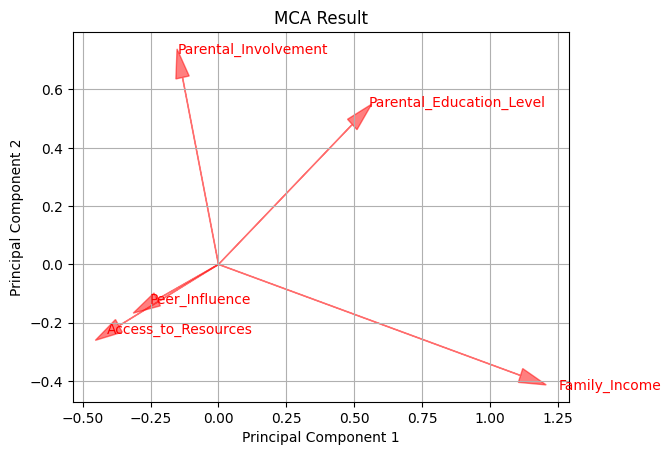

In [334]:
# Application de MCA
student_environment=['Motivation_Level','Teacher_Quality','Extracurricular_Activities','Internet_Access','Learning_Disabilities','Gender','School_Type','Student_Category']
parent_environment=['Parental_Involvement','Family_Income','Access_to_Resources','Peer_Influence','Parental_Education_Level']
d1=data5[student_environment]
d2=data5[parent_environment]
d=[d1,d2]
for element in d:
    mca = MCA(n_components=2)
    mca = mca.fit(element)
    mca_coords = mca.row_coordinates(element)
    df = pd.DataFrame(mca_coords)
    df.head()

    loadings = mca.column_coordinates(element)

    #Visualisation
    # plt.figure(figsize=(10, 8))
    # plt.scatter(mca_coords.iloc[:, 0], mca_coords.iloc[:, 1], alpha=0.5)

    # Plot the variable vectors
    features = element.columns
    for i, feature in enumerate(features):
        plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1], color='r', alpha=0.5, head_width=0.05, head_length=0.1)
        plt.text(loadings.iloc[i, 0] * 1.125, loadings.iloc[i, 1] * 1.125, feature, color='r')
    plt.title('MCA Result')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()



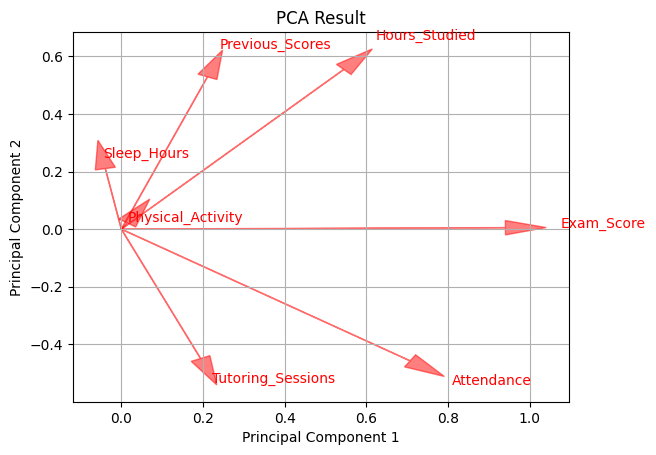

In [354]:
#PCA Methode
numeric1=numeric#.drop(columns=['Exam_Score'])
    #Step 1 : Standardize the data
scaler= StandardScaler()
df_scaled=scaler.fit_transform(numeric1)
    # Step 2 : Apply PCA
pca=PCA(n_components=2)
principal_components=pca.fit_transform(df_scaled)
    # Step 3: create a new dataframe with PCA result
pca_df=pd.DataFrame(data=principal_components)

# # Step 4 : Plot the results
# plt.figure(figsize=(8,6))
# plt.scatter(pca_df['PC1'],pca_df['PC2'])

# #Annotate the points with their labels
# for label, (x,y) in pca_df.iterrows():
#     plt.annotate(label,(x,y))

#Step 5: Get the PCA components (for variable vectors)
loadings=pca.components_.T * np.sqrt(pca.explained_variance_)

#Plot the variable vectors
features=numeric1.columns
for i,feature in enumerate(features):
    plt.arrow(0,0,loadings[i,0],loadings[i,1],color='r',alpha=0.5,head_width=0.05,head_length=0.1)
    plt.text(loadings[i,0]*1.145,loadings[i,1]*1.185,feature,color='r')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
